In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
state = 'PB'

In [3]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [4]:
cases = c_data[state].resample('D').mean()#D,W,MS

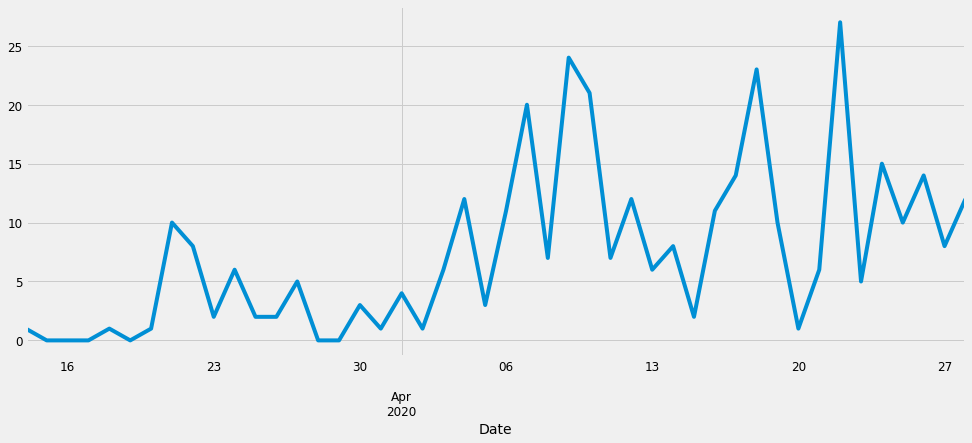

In [5]:
cases.plot(figsize=(15, 6))
plt.show()

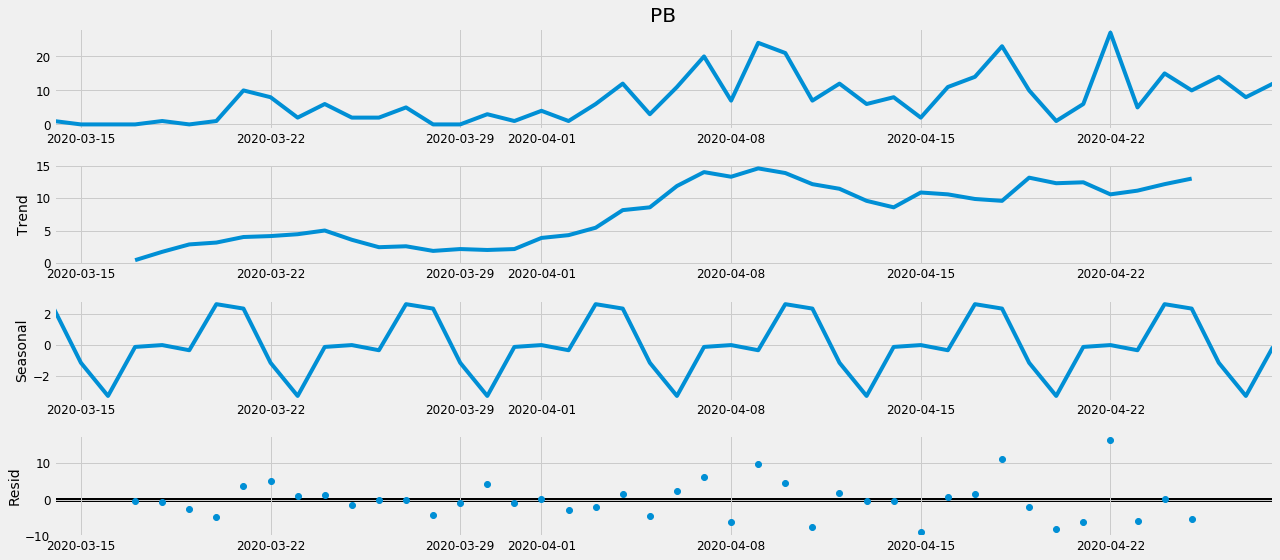

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:339.888210412796


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1141.7842075913304
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:241.35098103120853
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:159.22774486436643
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:249.14909586394086

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1216.9791668740886
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:169.06296627722188
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:159.8005127922222
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:320.11582217627586
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1481.4721330696748
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:233.96832305130903

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:152.3644962906908
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:247.2160020129522


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1449.4784014358574
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:168.57721407775375
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:154.23789906576823
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:310.1688421127267
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1431.152270240823
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:243.69670737991947
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:154.67253539597343
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:242.2977033760426


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1296.0216987166973
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:163.1570305718882
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:155.90901950017522
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:286.43385643242084
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1399.9503339084017
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:227.10450108230995
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:137.31222362024292
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:229.25261147797835
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1364.3065266758058
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:156.95076990904576
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:142.27258322107517
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:311.5373415454406


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1037.1523470526813
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:239.230360837362
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:156.76430576065997
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:237.66974113895913


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1004.0961911102395
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:156.86051604319857
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:158.46834371497047
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:294.3418209448485


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1172.8842646067667
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:233.04486047024326
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:149.86784677850787
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:231.24194450856436


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1127.689380287245
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:152.72571302145633
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:146.97668296609623
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:301.2679312963185


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1324.3629981059603
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:237.44327066049345
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:151.78796621119753
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:229.53416553208916


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1289.8057024437635
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:152.07995698780388
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:153.46493910514675
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:288.4328587965301


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1474.901179326447
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:228.3599373433651
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:138.25259208517969
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:224.91414828676602


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1442.8180763484354
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:150.54049416037648
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:143.88754443665084


In [9]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2130      0.252      0.844      0.399      -0.282       0.708
ma.L1         -1.0000   3177.532     -0.000      1.000   -6228.849    6226.849
ma.S.L12      -0.4617      0.281     -1.645      0.100      -1.012       0.089
sigma2        50.4336    1.6e+05      0.000      1.000   -3.14e+05    3.14e+05


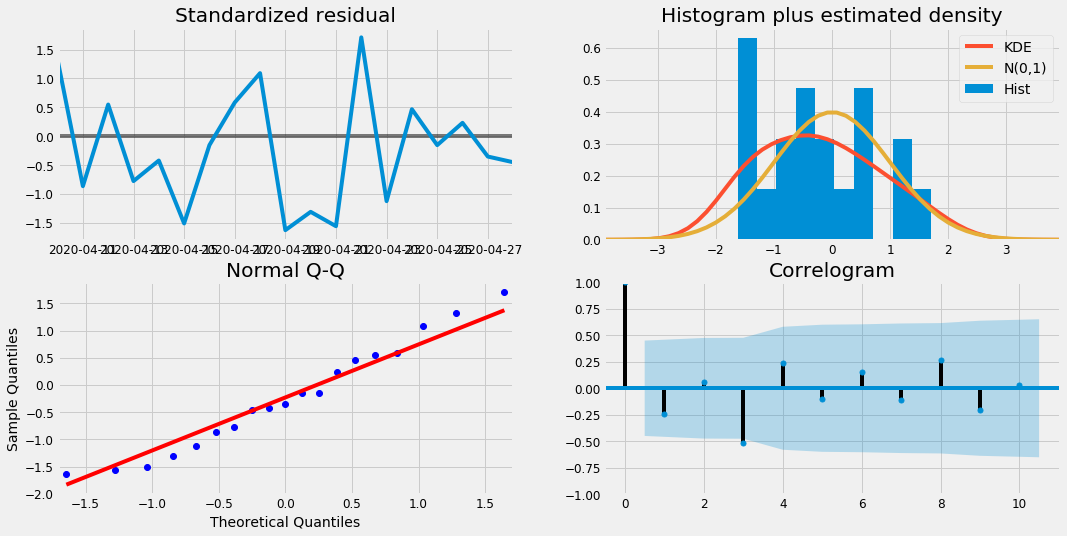

In [10]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

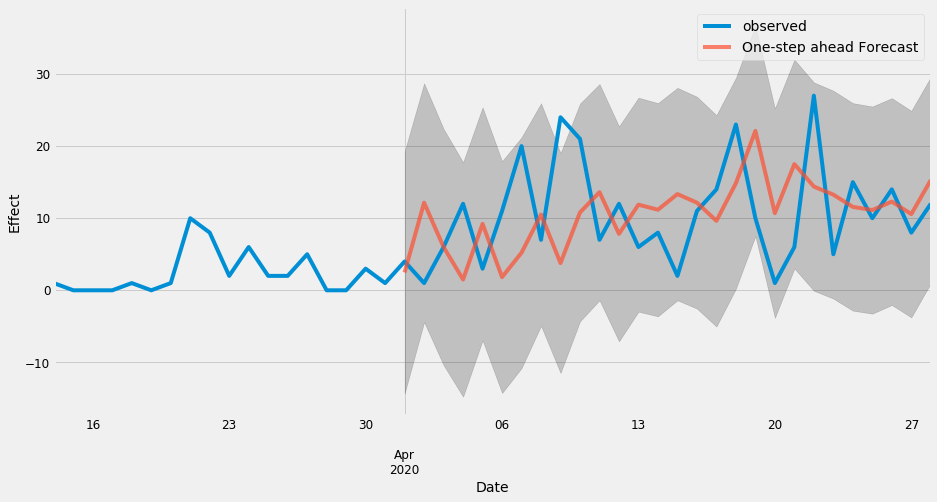

In [11]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [12]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 73.54


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 8.58


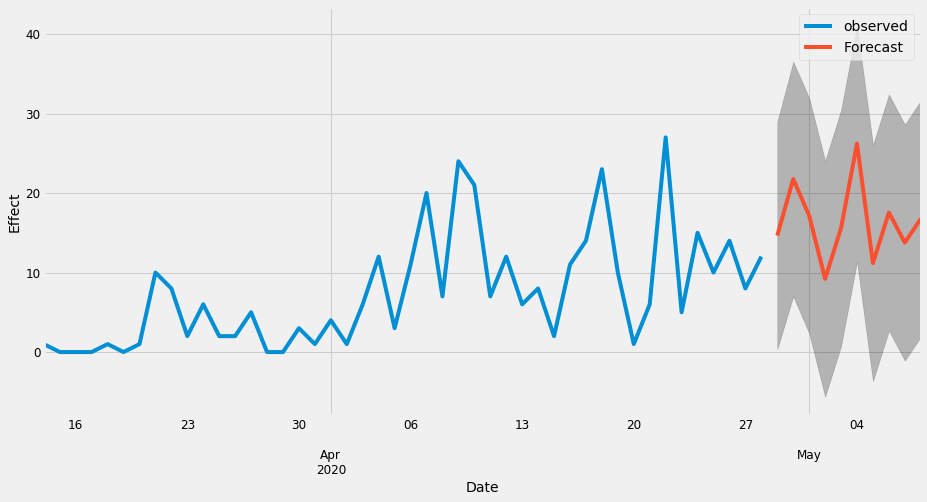

In [14]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [15]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [16]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [17]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,15,4
2020-04-25,10,2
2020-04-26,14,12
2020-04-27,8,14
2020-04-28,12,3


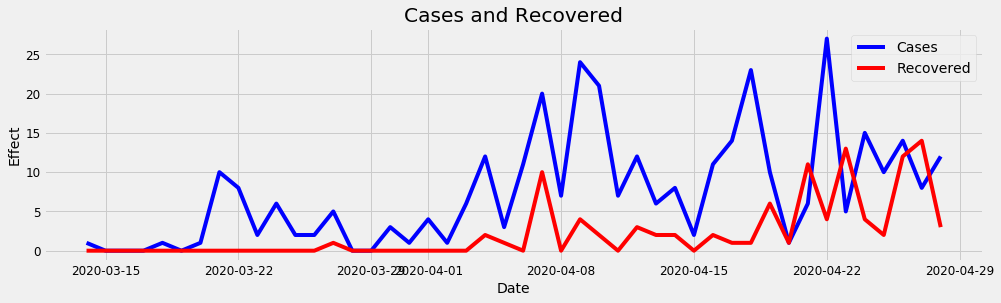

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [19]:
recovered = total_data['Recovered'].resample('D').mean()

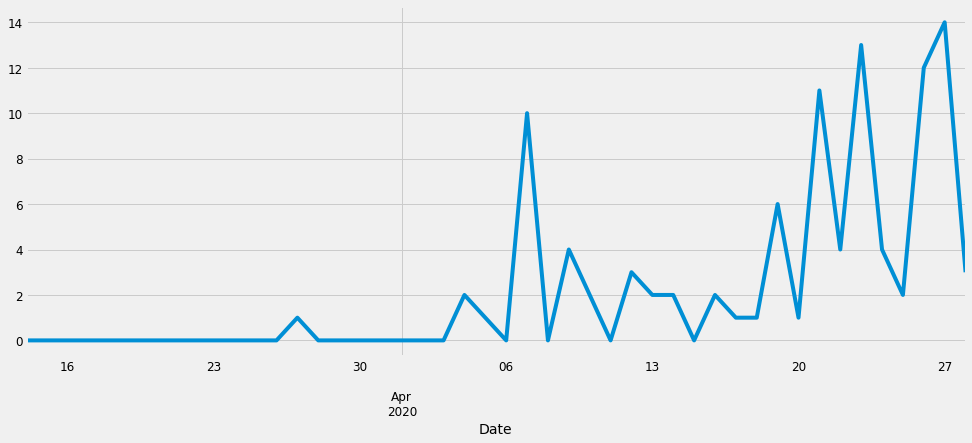

In [20]:
recovered.plot(figsize=(15, 6))
plt.show()

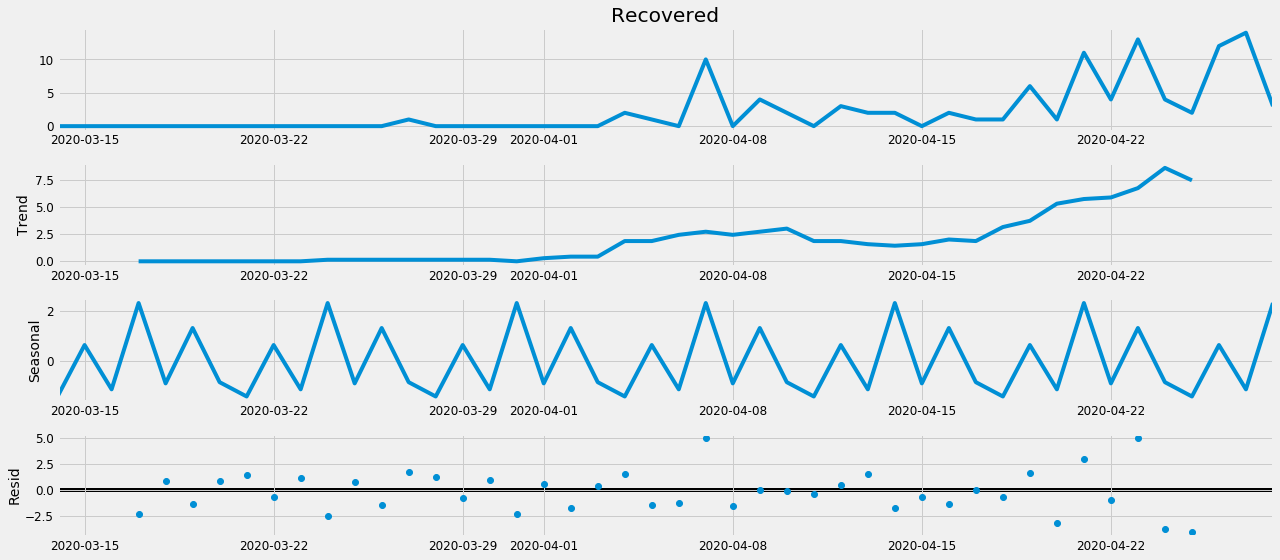

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:262.5189086797134


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1201.7862191450718
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:195.5911723721116
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:133.09564292312632
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:202.3556402726789


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1470.1286943141445
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:141.74838152229992
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:135.09565628384814
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:252.4067327796031

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1198.8775507427072
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:189.9854501947868
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:127.21821008091679
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:201.43460182946416


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1191.7050416003322
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:141.46942385186617
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:129.12973258592905
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:256.68428006858187


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1123.6975271326905
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:200.90851560574055
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:130.14683746899607
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:203.58745490524765


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1162.4226802416676
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:138.75763073812684
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:132.14234017394782
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:227.79885872567203


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1300.7767871273172
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:179.901937760098
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:116.20545587570273
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:186.7376265830376
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1318.1843346682056
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:130.5708100093834
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:118.53006549051733
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:251.02159942649968


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1220.7163608290252
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:194.23250079098963
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:132.10457511121788
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:195.08660983180775


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1213.1543279800017
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:132.0714254892489
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:134.06357193064053
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:229.6262379051457
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1163.4230274093443
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:185.15223423400587
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:121.55167034277109
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:185.41521392629377


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1140.450083010259
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:129.15520982260716
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:123.55161845202134
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:239.35214703794097


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1222.5117411340889
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:193.99693774336092
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:126.89072130815899
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:187.08096327969318


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1240.6543874808722
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:126.36783370324112
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:128.14221971768032
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:226.37165475370054


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1146.7465284719776
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:181.5009735420661
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:118.00113694354503
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:181.424592518196


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1172.0300282348874
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:123.3437011899701
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:119.65048661147121


In [23]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1659      0.296     -0.561      0.575      -0.746       0.414
ma.L1         -0.7469      0.250     -2.992      0.003      -1.236      -0.258
ma.S.L12      -0.6824      1.724     -0.396      0.692      -4.061       2.696
sigma2        17.1637     17.856      0.961      0.336     -17.834      52.161


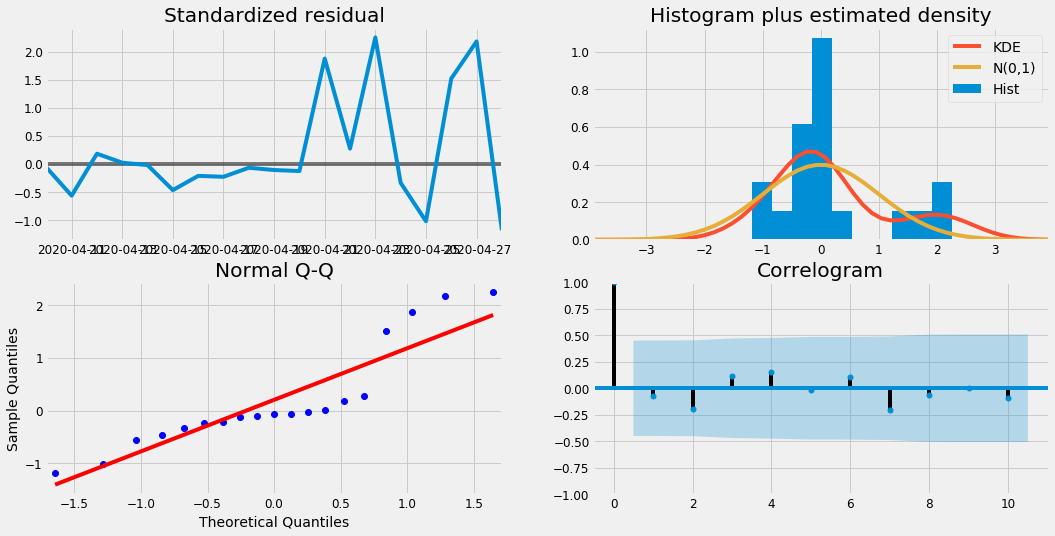

In [24]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

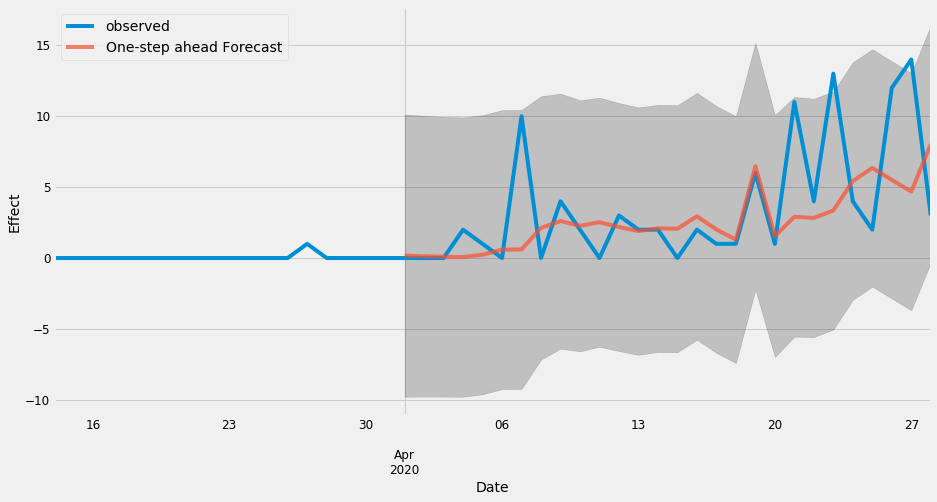

In [25]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [26]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 16.01


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 4.0


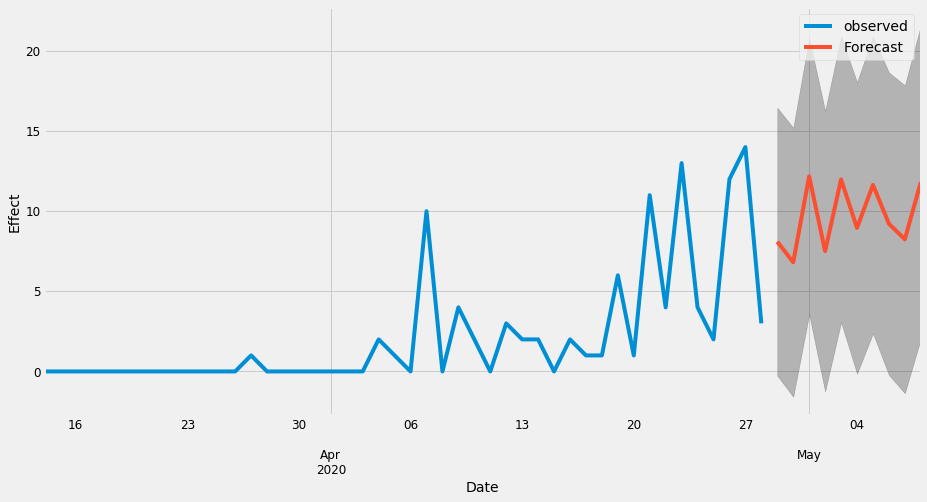

In [28]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

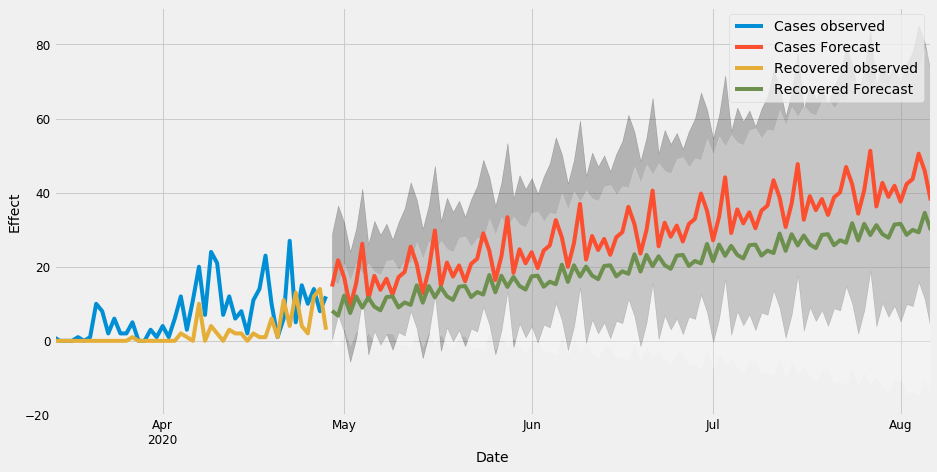

In [29]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [30]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [31]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [32]:
int(np.mean(cases_result_date)[0])

29

In [33]:
int(min(cases_result_date[0]))

9

In [34]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-05-02


In [35]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [36]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-07-24


In [37]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-06


In [38]:
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 9, 6

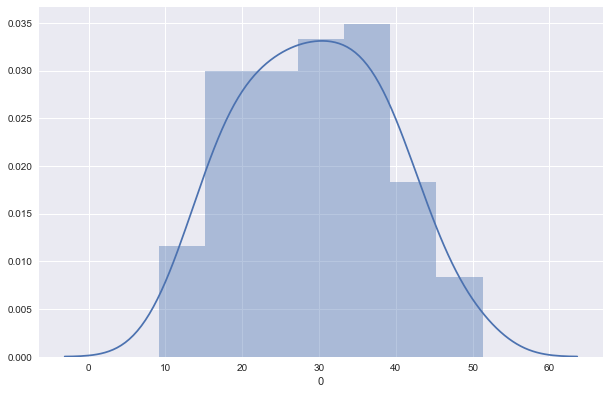

In [39]:
sns.distplot(cases_result_date[0])
plt.show(block=True)

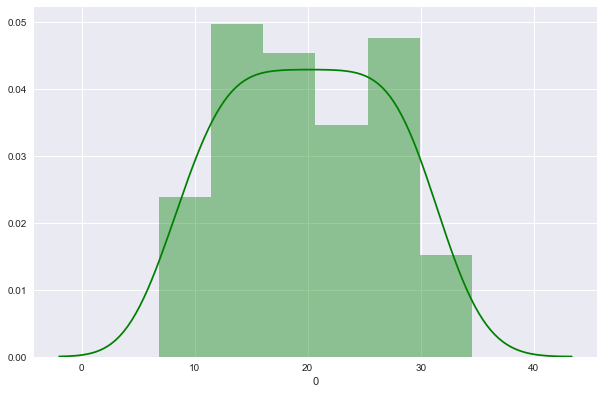

In [40]:
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

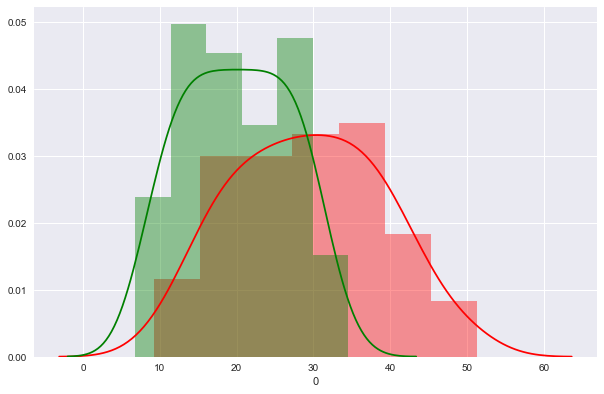

In [41]:
sns.distplot(cases_result_date[0],color='red')
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

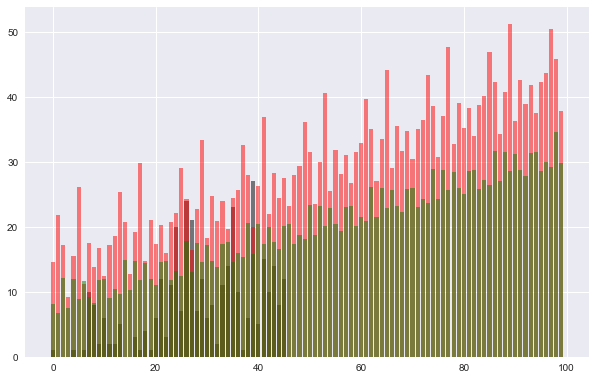

In [42]:
plt.bar([i for i in range(len(total_data['Cases']))], total_data['Cases'], align='center', alpha=0.5, color = 'black')
plt.bar([i for i in range(len(total_data['Recovered']))], total_data['Recovered'][0], align='center', alpha=0.5, color = 'blue')
plt.bar([i for i in range(len(cases_result_date))], cases_result_date[0], align='center', alpha=0.5, color = 'red')
plt.bar([i for i in range(len(recovered_result_date))], recovered_result_date[0], align='center', alpha=0.5, color='green')
plt.show()